In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

# Random numbers

Numpy let you generate random numbers. Using the random number generators given as examples, implement the functions below.

In [2]:
np.random.normal()

-0.7558210235369787

In [3]:
mu = 10
variance = 2
np.random.normal(mu, variance, size=(3, ))

array([ 8.94047217, 10.58793792, 11.04478453])

In [4]:
p = 0.8
n = 10
np.random.binomial(n, p), np.random.binomial(1, p) # Binomial(n,p), Bernoulli(p)

(9, 1)

In [11]:
np.random.multivariate_normal(np.zeros(3), np.eye(3))

array([ 0.3281662 ,  1.86143265, -1.64005296])

In [5]:
np.random.binomial(1, p, size=(5, ))

array([1, 0, 0, 1, 1])

In [3]:
from scipy import linalg

def generate_wishart(n, covariance, k=1):
    """
    Return k Wishart matrices with degrees of freedom n
    and given covariance.
    
    Parameters
    ----------
    n: int
        degrees of freedom
    covariance: np array of shape (p, p)
        covariance matrix
    k: int or None (optional)
        number of wishart matrices to return
    
    Return
    ------
    W: np array of shape (k, p, p)
        k Wishart matrices
    """
    p = covariance.shape[0]
    W = []
    for i in range (k):
        X = []
        for j in range (n):
            X.append( np.random.multivariate_normal(np.zeros(p), covariance))
        X = np.array(X)
        W.append(np.dot(X.T, X))      
            
    return np.array(W)
    
W = generate_wishart(5, np.eye(3))
print('shape ', W.shape)
W

shape  (1, 3, 3)


array([[[3.02456988, 0.75446705, 2.22041852],
        [0.75446705, 6.07949198, 0.68676831],
        [2.22041852, 0.68676831, 2.29569669]]])

In [15]:
np.random.choice(6) + 1 # roll a die

1

In [16]:
1 + np.random.choice(6, p =[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], size=(10, ))  # roll a die 10 times

array([2, 5, 3, 5, 5, 3, 2, 6, 3, 6])

In [17]:
# roll a biased die 10 times
1 + np.random.choice(6, p =[1/10, 1/10, 1/10, 1/10, 1/10, 1/2], size=(10, )) 

array([6, 5, 6, 6, 4, 1, 6, 3, 6, 6])

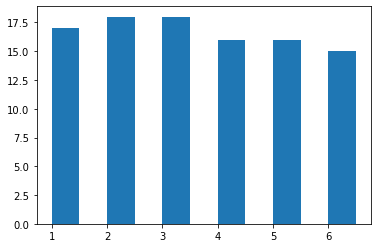

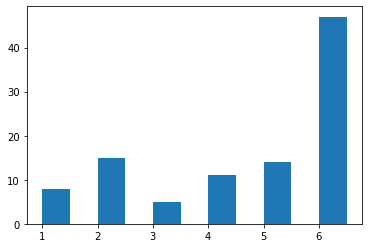

In [5]:
def biased_die_histogram(p, k):
    """
    Draw a biased dice with probabilities p, k times, and plot the resulting histograms.
    There should be six bars.
    
    Parameters
    ----------
    p : np array of shape (6,)
        The probabilities associated with each outcome of the dice.
    k: int
        Number of rolls
    """
    rolls = 1 + np.random.choice(6, p=p, size=(k, )) 
    plt.hist(rolls, bins = np.arange(1, 7, 0.5))
    plt.show()
    #raise NotImplementedError

biased_die_histogram([1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 100)
biased_die_histogram([1/10, 1/10, 1/10, 1/10, 1/10, 1/2], 100)

# SVD, Pseudo-Inverse in numpy

Generate a random matrix A of size (3, 6) with iid N(0,1) entries, and verify that the singular values squared are the eigenvalues of the matrix $A^TA$.

Verify that the pseudo-inverse computed by ``np.linalg.pinv`` is the same as the pseudo-inverse computed from its definition using the SVD.

In [44]:
?np.testing.assert_allclose

In [6]:

def test_singular_values_eigenvalues():
    """Test that the square of the singular values of X gives the eigenvalue of X^T.dot(X)
    """
    #generation
    A = np.random.normal(0, 1, size=(3,6))

    #compute singular values
    U, S, VT = np.linalg.svd(A)
    S2 = np.sort(S**2)
    
    #compute eigenvalues
    D, E = np.linalg.eig(np.dot(A, A.T))
    D = np.sort(D)
    
    np.testing.assert_allclose(S2, D)

    #raise NotImplementedError

test_singular_values_eigenvalues()

def test_pinv():
    """Test that computing the pseudo inverse with pinv or via svd gives the same result
    """
    #generation
    A = np.random.normal(0, 1, size=(3,6))
    #compute pseudo inverse
    PI = np.linalg.pinv(A)
    print(PI)
    
    #compute singular values
    U, S, VT = np.linalg.svd(A)
    
    D = np.zeros((A.shape[1], A.shape[0]))
    for i in range(len(S)):
        D[i,i] = 1/S[i]
        
    PI_SVD = np.dot(VT.T, np.dot(D, U.T))

    print(PI_SVD)
    np.testing.assert_allclose(PI, PI_SVD)
    
    
    #raise NotImplementedError

test_pinv()

[[-0.32037479  0.29405451 -0.48711143]
 [-0.1484658   0.0375576  -0.0779954 ]
 [-0.01367301  0.14803404 -0.09231059]
 [-0.31806782  0.4536535  -0.08479424]
 [ 0.59032883 -0.19642552  0.18569725]
 [ 0.7428368   0.15347685  0.06107251]]
[[-0.32037479  0.29405451 -0.48711143]
 [-0.1484658   0.0375576  -0.0779954 ]
 [-0.01367301  0.14803404 -0.09231059]
 [-0.31806782  0.4536535  -0.08479424]
 [ 0.59032883 -0.19642552  0.18569725]
 [ 0.7428368   0.15347685  0.06107251]]


# Boxplots

Using matplotlib, for each $\theta = 1,2,...20$, generate 100 independent copies of a random variable with $N(\theta, \theta^{-1})$ distribution. Plot the generated random variables with boxplots, one boxplot for each value of $\theta$ and the x-axis representing $\theta$.

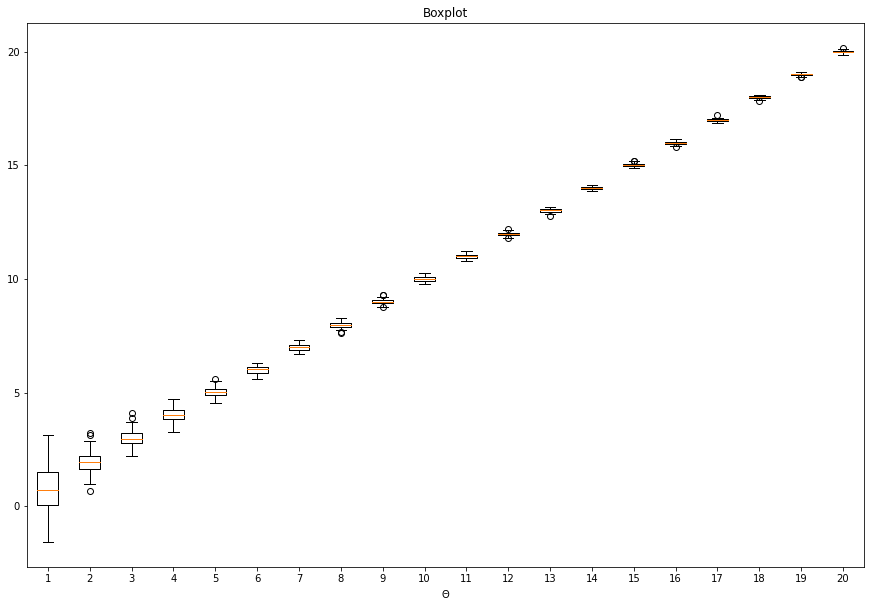

In [7]:
def plot_boxplot_normal_increasing_mean_and_variance():
    """Using matplotlib, for each theta = 1,2,...,20, 
    generate 100 independent copies of a random variable 
    with N(theta, theta^{-1}) distribution. 
    Plot the generated random variables with boxplots, 
    one boxplot for each value of theta and 
    the x-axis representing theta.
    """
    data = []
    for t in range(1, 21):
        data.append(np.random.normal(t, 1/t, size=100))
    
    plt.figure(figsize  = (15, 10))
    plt.boxplot(data)
    plt.xlabel('$\Theta$')
    plt.title('Boxplot')
    #raise NotImplementedError

plot_boxplot_normal_increasing_mean_and_variance()

# Quantile quantile plots

In order to check visually that a collection of random variables follow a certain distribution, quantile quantile plots are convenient.

In [24]:
n = 10
X = np.random.randint(1000, size=n) # generate n numbers
X_sort = np.sort(X) # sort them
scores  = np.arange(1, n + 1) / (n+1) # their corresponding scores (many other methods are possible)

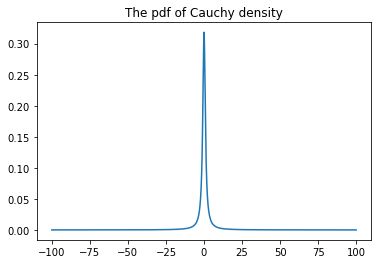

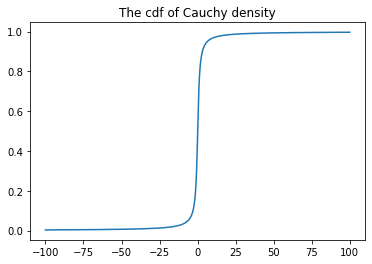

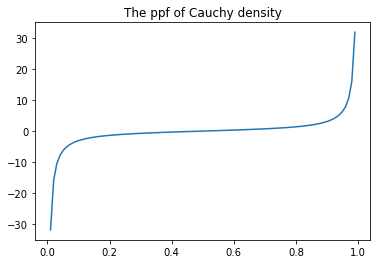

20%, 50% and 60% quantiles: [-1.37638192  0.          0.3249197 ]


In [25]:
# Getting theoretical quantities on distributions
cauchy = scipy.stats.cauchy # many others are available
# the probability density function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The pdf of Cauchy density")
plt.plot(X, cauchy.pdf(X))
plt.show()
# the cumulative distribution function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The cdf of Cauchy density")
plt.plot(X, cauchy.cdf(X))
plt.show()
# the percent point function (inverse of cdf)
X = np.arange(0, 1, 0.01)
plt.figure()
plt.title("The ppf of Cauchy density")
plt.plot(X, cauchy.ppf(X))
plt.show()
# Theoretical 20%, 50% and 60% quantiles of cauchy distribution
quantiles = cauchy.ppf((0.2, 0.5, 0.6))
print("20%, 50% and 60% quantiles:", quantiles)

1. Generate 100 independent copies of N(1,3) random variables and plot the QQ-plot
against the theoretical quantiles of the N(0,1), N(5, 3) and N(1,3) distribution. Superpose on the plot the line y=x.

2. Generate 100 independent copies of chi-square random variables with 5 degrees of freedom,
and compare those aginst the theoretical quantiles of the N(5,1) distribution, the $\chi^2_4$ distribution, the $\chi^2_5$ distribution, the $\chi^2_6$ distribution.Superpose on the plot the line y=x.

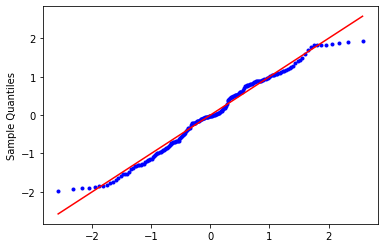

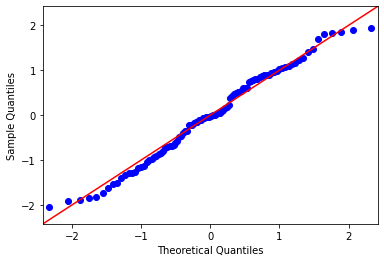

In [82]:
def qqplot(data, distribution):
    """
    Generate a qqplot using the quantiles of the data and the theoretical data of the distribution.
    Superpose on the plot the line y=x.
    
    Parameters
    ----------
    data: np array of shape (100,)
        Empirical data
    
    distribution: distribution from scipy.stats
        Theoretical distribution to compare to
    """
    u = np.arange(0.005, 1, 0.005)
    X = distribution.ppf(u)
    Y = np.quantile(data, u)

    plt.plot(X, Y, '.b')
    plt.plot(X, X, '-r')
    plt.ylabel('Sample Quantiles')

    #plt.show()
    #raise NotImplementedError
    
def test_qqplot_sm():
    """
    Test the plot is the same as in sm.qqplot
    """
    X = np.random.normal(0, 1, size=100)
    qqplot(X, scipy.stats.norm)
    sm.qqplot(X, line='45')
    
test_qqplot_sm()

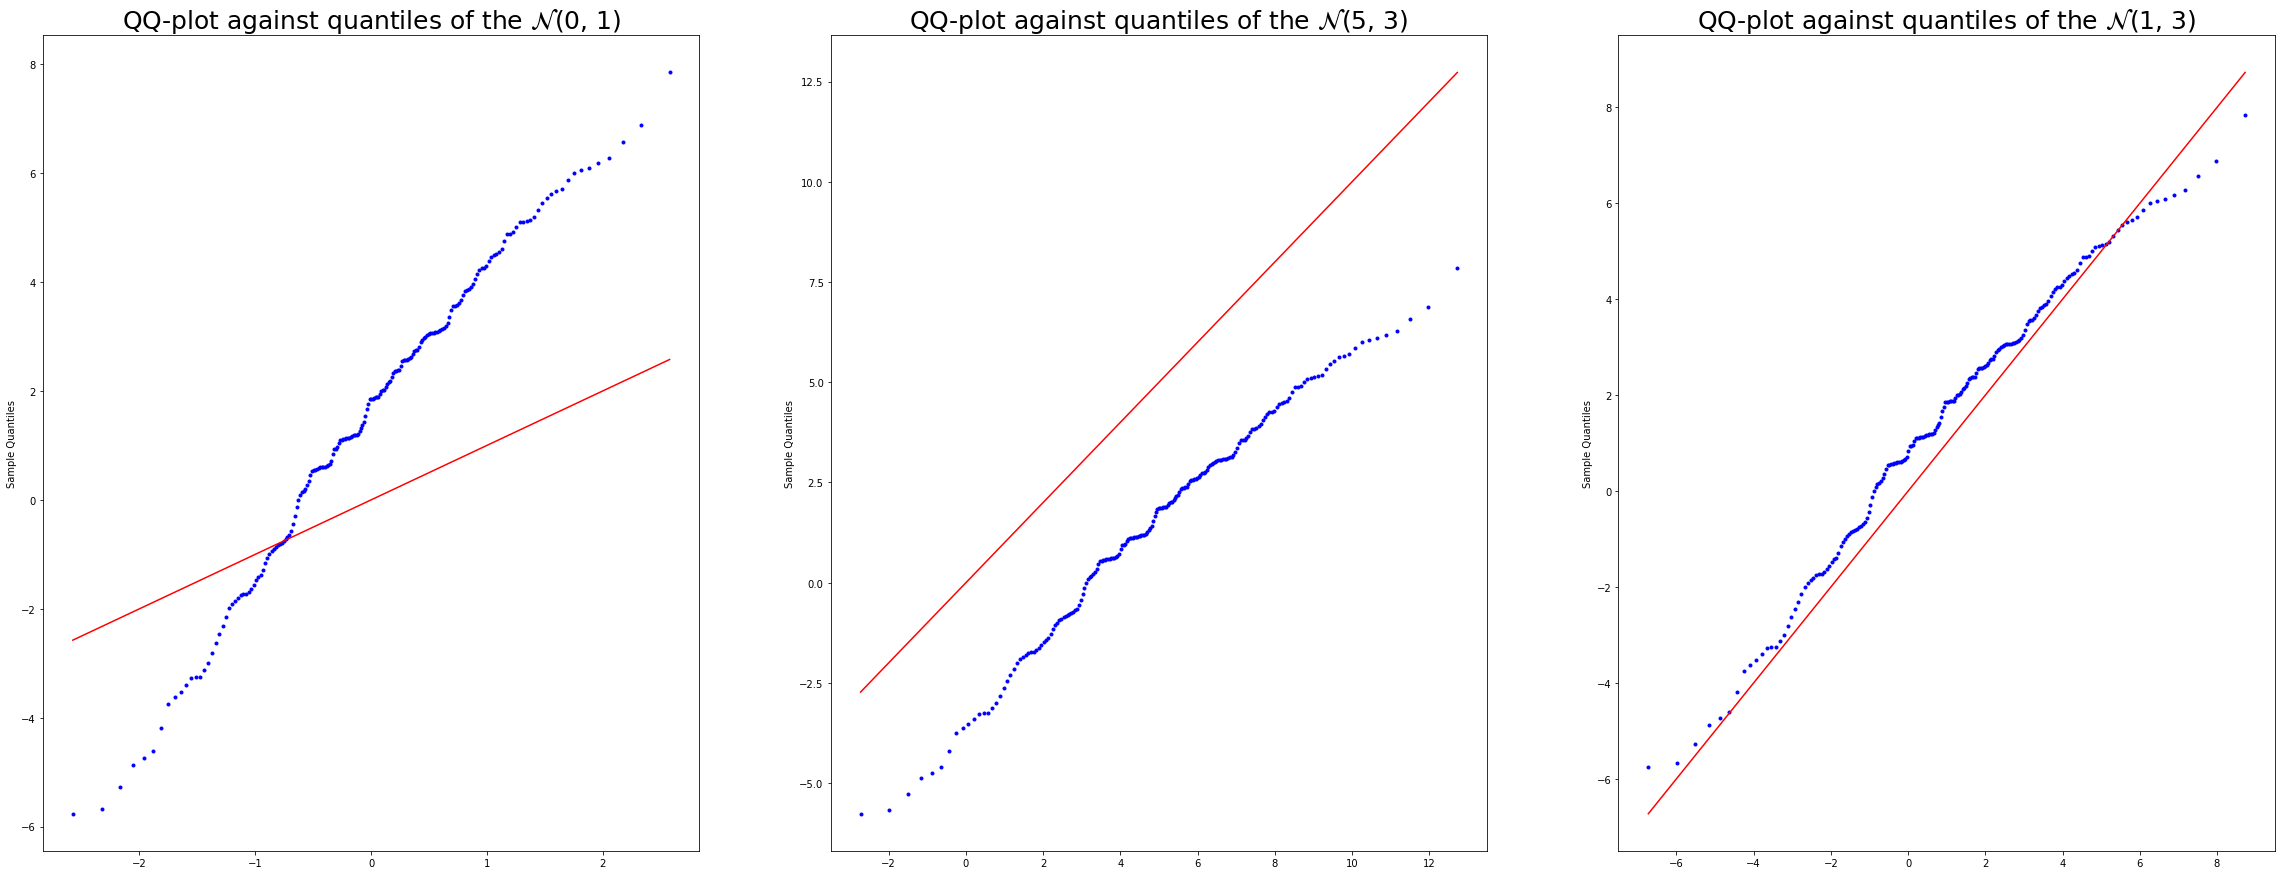

In [97]:
#Generate 100 independent copies of N(1,3) random variables
data = np.random.normal(1, 3, size= 100)

fig = plt.figure(figsize= (40,15))

fig.add_subplot(1, 3, 1)
qqplot(data, scipy.stats.norm)
plt.title('QQ-plot against quantiles of the $\mathcal{N}$(0, 1)', fontsize=25)

fig.add_subplot(1, 3, 2)
qqplot(data, scipy.stats.norm(5,3))
plt.title('QQ-plot against quantiles of the $\mathcal{N}$(5, 3)', fontsize=25)

fig.add_subplot(1, 3, 3)
qqplot(data, scipy.stats.norm(1, 3))
plt.title('QQ-plot against quantiles of the $\mathcal{N}$(1, 3)', fontsize=25)

plt.show()
#raise NotImplementedError
# Answer 1.

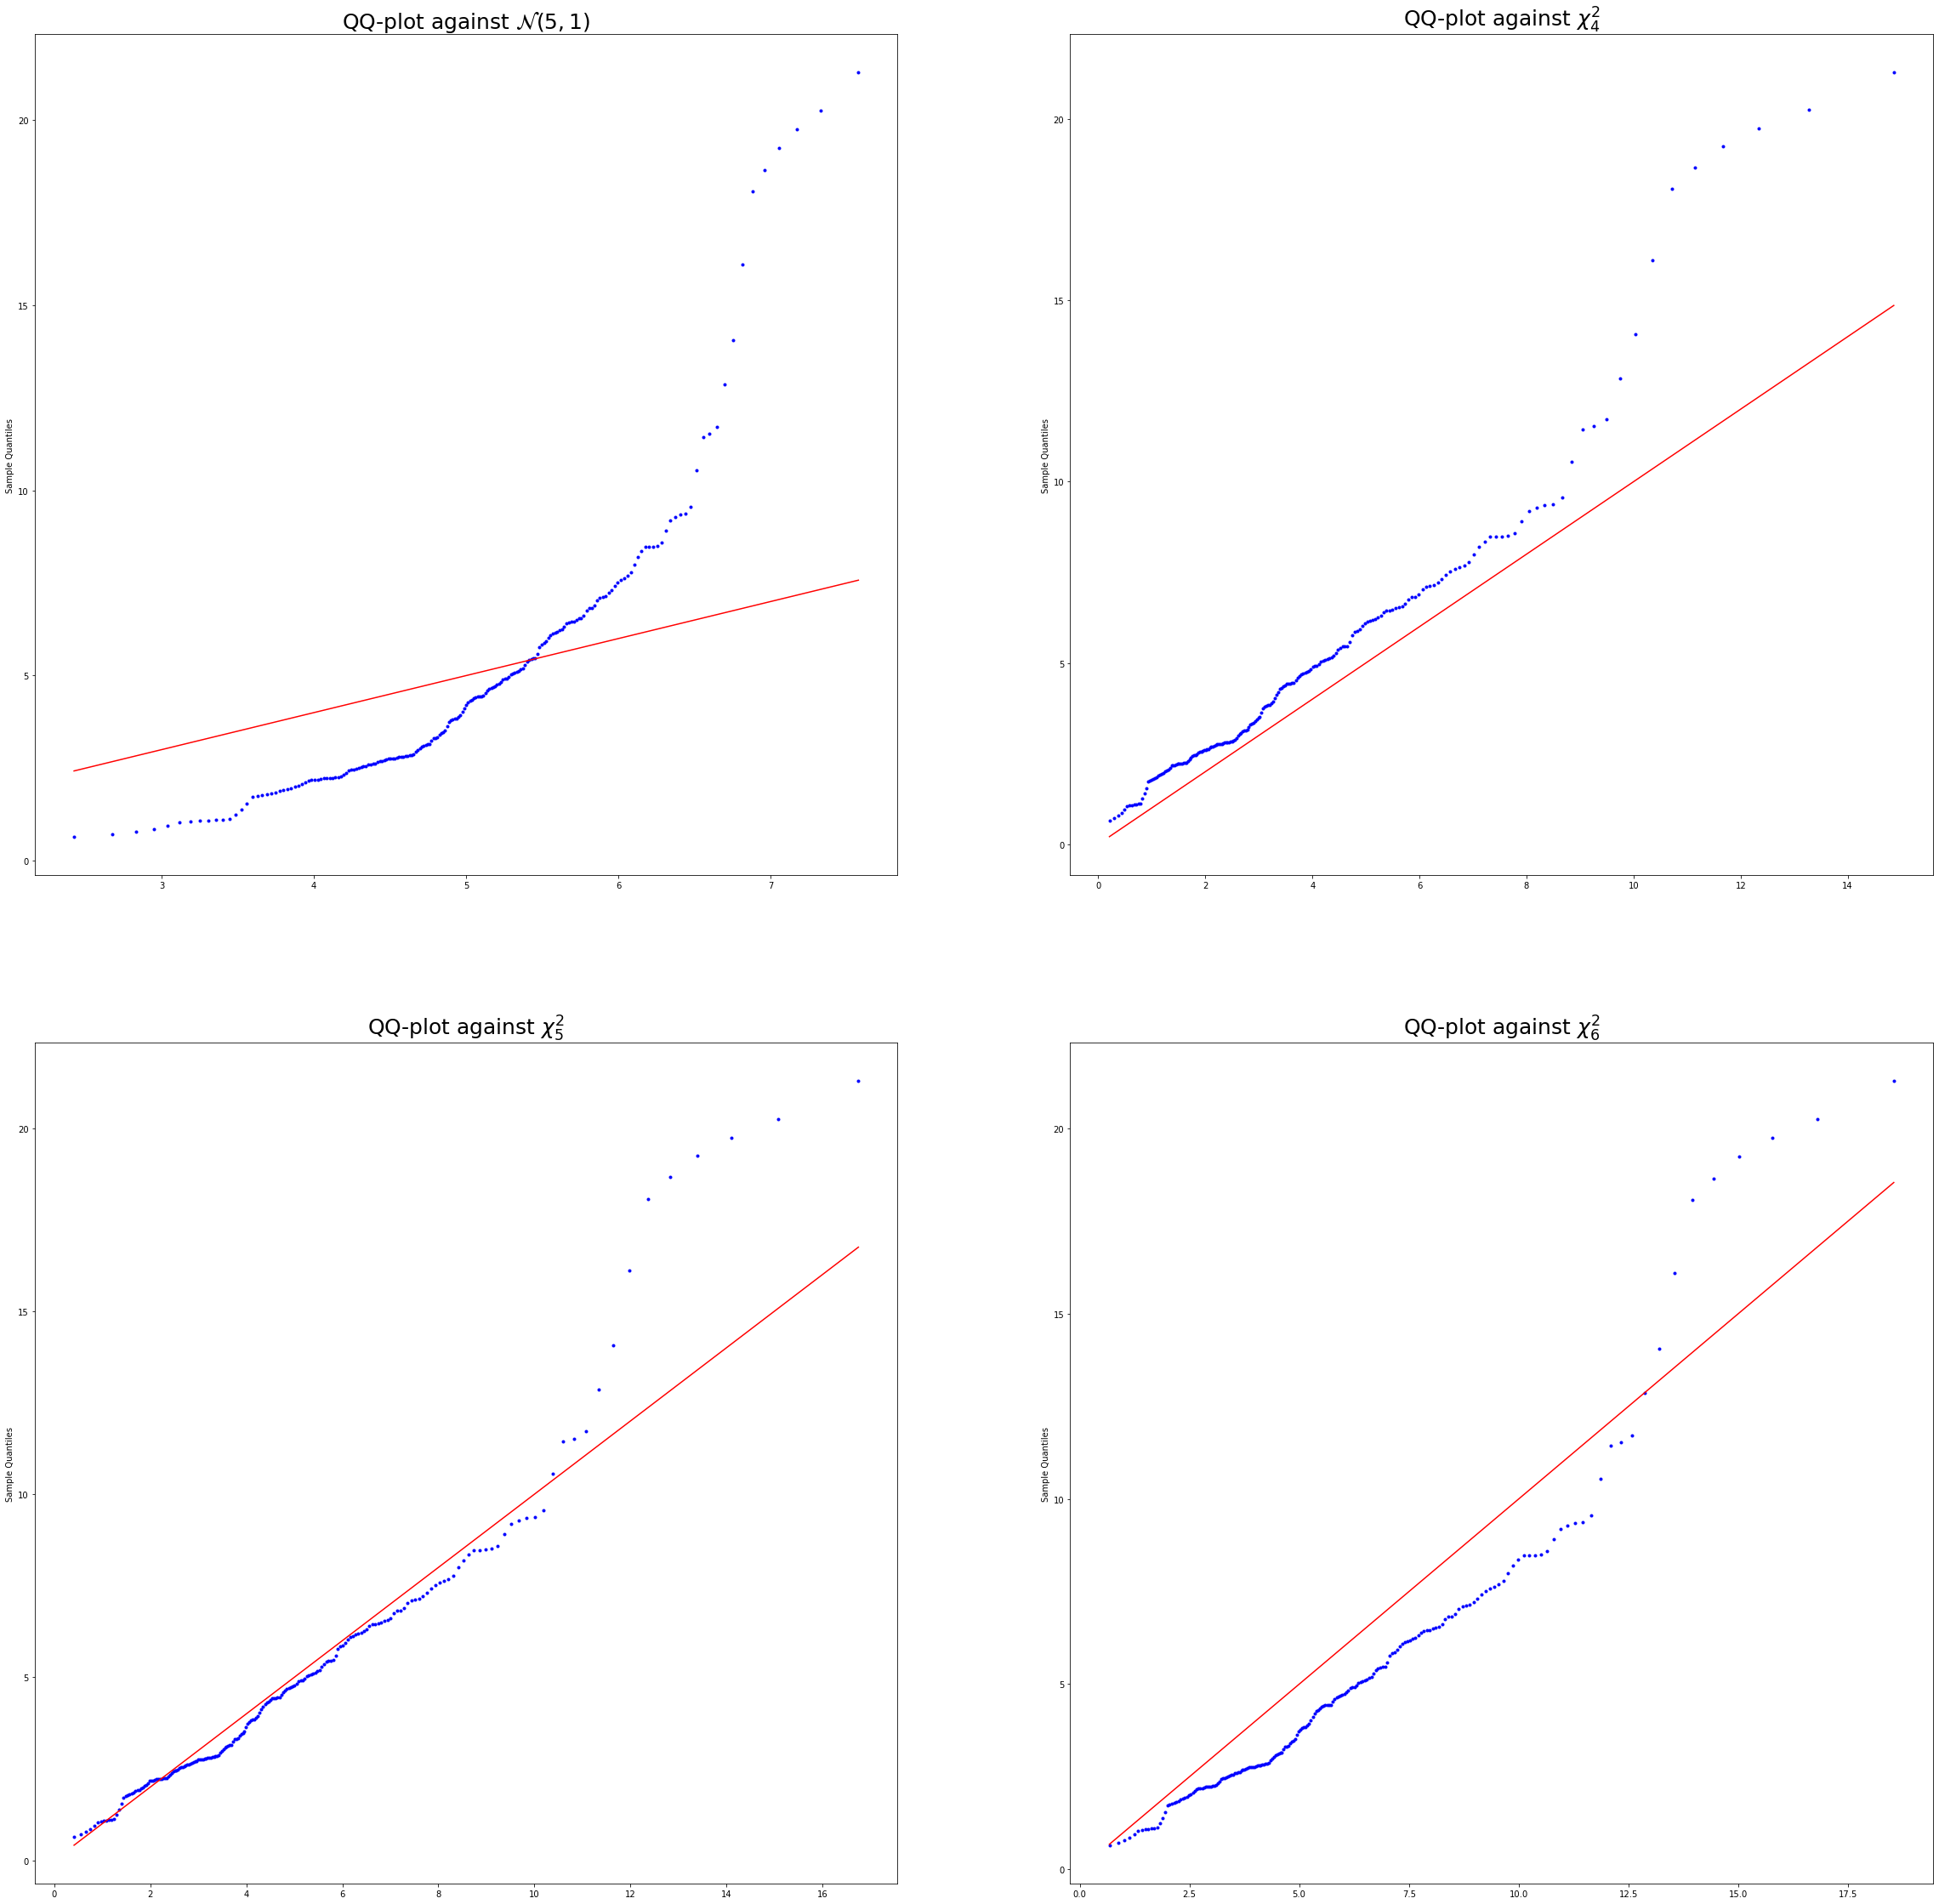

In [102]:
# Answer 2.
data = np.random.chisquare(5, 100)

fig = plt.figure(figsize = (40, 40))

fig.add_subplot(2, 2, 1)
qqplot(data, scipy.stats.norm(5,1))
plt.title('QQ-plot against $\mathcal{N}(5,1)$', fontsize=25)

fig.add_subplot(2,2, 2)
qqplot(data, scipy.stats.chi2(4))
plt.title('QQ-plot against $\chi^2_4$', fontsize = 25)

fig.add_subplot(2, 2, 3)
qqplot(data, scipy.stats.chi2(5))
plt.title('QQ-plot against $\chi^2_5$', fontsize = 25)

fig.add_subplot(2, 2, 4)
qqplot(data, scipy.stats.chi2(6))
plt.title('QQ-plot against $\chi^2_6$', fontsize = 25)

plt.show()
#raise NotImplementedError

# Generate a simple regression model

Given the sample size n and dimension p, generate a dataset (y, X) where y has size n and X has size n times p,
such that
$y = X \beta^* + \beta_0^* + \epsilon$ where $\epsilon$ has iid $N(0,\sigma^2)$ entries, $X$ has iid $N(0,1)$ entries, and $\beta^*\in R^p$ has norm equal to the signal strength parameter, and $\beta_0^*$ is the intercept.

In [29]:
def linear_regression(X, beta_true, sigma):
    """
    Applies the linear regression model
    
    Parameters
    -----------
    
    X: np array of shape (n, p)
    input features

    beta_true: np array of shape (p)
    true coefficients
    
    sigma: float
    noise standard deviation 

    Return
    ------
    y: np array of shape (n,)
    responses generated accroding to the linear regression model
    y= X beta_star + eps
    """
    raise NotImplementedError

def generate_dataset(n, p, sigma=0.7, signal_strength=2):
    """
    Generate a data set (with intercept = 0)
    Take beta_star uniformly in the sphere of length: signal_strength
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p)
        Features
    y: np array of shape (n,)
        Target
    b_true: np array of shape (p,)
    """
    raise NotImplementedError

def test_nointercept():
    """
    Check that X.dot(b_true) = y when the noise is 0
    """
    X, y, b_true = generate_dataset(100, 10, sigma=0, signal_strength=1)
    np.testing.assert_allclose(X.dot(b_true), y)
    
test_nointercept()

def generate_dataset_with_intercept(n, p, sigma=0.7, signal_strength=2):
    """
    Generate a data set, same as before, but here the returned array X should have
    p+1 columns, and the first column contains only 1,1,...,1 to accout for
    possible intercept.
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p + 1)
        Features, last column contains only ones
    y: np array of shape (n,)
        Target
    b_true: np array of shape (p,)
        true coefficients (last one is the intercept)
    """
    raise NotImplementedError

def test_intercept():
    """
    Check that X.dot(b_true) = y when the noise is 0 and intercept = 0
    """
    X, y, b_true = generate_dataset_with_intercept(100, 10, sigma=0, signal_strength=1)
    np.testing.assert_allclose(X[:, :-1].dot(b_true[:-1]) + b_true[-1], y)
    
test_nointercept()
test_intercept()

NotImplementedError: 

# Least-squares

Given a design matrix X and response y,
implement the least-squares estimate $\hat\beta = (X^TX)^\dagger X^Ty$
using several methods:

1. using the SVD of X `np.linalg.svd`
2. using the pseudo-inverse of X `np.linalg.pinv`
3. using the inverse of $X^TX$ if full-rank, and its pseudo-inverse otherwise
4. using `scipy.linalg.lstsq`

For $p=10, n=20$, generate a dataset using the previous functions and verify that all methods give the correct estimate of $\beta$ when there is no noise.

For $p=10, n=20$, generate a dataset using the previous functions and verify that all methods give the same estimate.


In [33]:
def compute_least_squares_using_SVD(X, y):
    raise NotImplementedError
    
def compute_least_squares_using_pseudo_inverse(X, y):
    raise NotImplementedError
    
def compute_least_squares_using_method3(X, y):
    raise NotImplementedError

def compute_least_squares_using_scipy(X, y):
    raise NotImplementedError
    
def test_lsqr():
    """Test that all methods yield the correct beta when there is no noise
    """
    raise NotImplementedError
        
def test_same_estimate():
    """ Test that all methods yield the same estimate of beta
    """
    raise NotImplementedError

        
test_lsqr()
test_same_estimate()

NotImplementedError: 

# The distribution of the MLE, the residuals, and the loss

By computing 100 independent datasets with $p=10, n=30$, verify with histograms and
QQ-plots that the squared norm $\|y-X\hat\beta\|^2/\sigma^2$ has chi square distribution, and recall its degrees of freedom.

In [34]:
def error_residual_plot():
    raise NotImplementedError
    
error_residual_plot()


NotImplementedError: 

# The curve of the risk of the MLE in high dimension

1. Fix $n=200$, noise level $\sigma^2=0.7$, signal strength $2$, and a grid of values for $p/n$, say $0.1, 0.2, 0.3, 0.4, ..., 2.9, 3.0$. For each for of $n, p$, generate $10$ independent datasets and plot the boxplots corresponding the squared error $\|\hat\beta - \beta^*\|^2$ for each given ratio $p/n$. If $p>n$, make sure that $\hat\beta$ is the solution $(X^TX)^\dagger X^Ty$. Plot the corresponding theoretical curves for the expected squared error found using the formula for expected inverse Wishart matrices.

2. Bonus: Plot also the boxplots for the the bias and variance of the squared error. 

In [35]:
# Question 1
raise NotImplementedError
# Question 2
raise NotImplementedError

NotImplementedError: 